# Exploring Weather Trends - Athens, GR compared to the World - Udacity Project

For the porject, I choose the city, I am currently living in, [Athens, Greece, Europe](https://osm.org/go/xxSiEUQ-) to visualize and describe the similarities and differences between the local and global temperature trends.

# The Dataset

Within the project we have been given access to a database via a webinterface with the following schema:
- three tables in the database:
1. city_list - Fields: city \ country
2. city_data - Fields: year \ city \ country \ avg_temp (ºC)
3. global_data - This contains the average global temperatures by year (ºC).

# The Queries

1. For explaration I entered the SQL query:
```
SELECT * FROM city_list WHERE country='Greece'
```
which showed me that the only dataset for the country Greece came from Athens, Greece, my chosen target.

2. As next step I issued the query to the city_data table:
```
SELECT * FROM city_data WHERE city='Athens'
```
This resulted in 261 results, which I downloaded as CSV file for later use.

3. As last step I queried the global_data table with the query:
```
SELECT * FROM global_data
```
with 266 results, also downloaded as CSV file.

4. The different result sets show us that we have to view the datasets before we work with them.
They will be uploaded to github next to this notebook to work with them.  
4.1. [city_data_Athens](https://raw.githubusercontent.com/universalamateur/Udacity_Data_Analyst_Nanodegree/main/Exploring%20Weather%20Trends%20-%20Project/city_data_WHERE_city_Athens.csv)  
4.2. [global_data](https://raw.githubusercontent.com/universalamateur/Udacity_Data_Analyst_Nanodegree/main/Exploring%20Weather%20Trends%20-%20Project/global_data.csv)

# The Alternativ Queries
- A different Aproach would be to do some work directly in the query:  
1. Renaming Columns and using only what we need:
1.1. city_data  
```
SELECT year, avg_temp AS avg_temp_athens FROM city_data WHERE city='Athens'
```
- result count: 261
1.2. global_data
```
SELECT year, avg_temp AS avg_temp_global FROM global_data
```
- result count: 266
2. Even one step further would be a FULL (OUTER) JOIN (Returns all records when there is a match in either table) to get all results.
2.1. one direction
```
SELECT city_data.year, global_data.year, global_data.avg_temp AS avg_temp_global, city_data.avg_temp AS avg_temp_athens FROM global_data FULL JOIN city_data ON global_data.year = city_data.year WHERE city_data.city='Athens';
```
- result count: 261
2.2. other direction
```
SELECT city_data.year, global_data.year, global_data.avg_temp AS avg_temp_global, city_data.avg_temp AS avg_temp_athens FROM city_data FULL JOIN global_data ON city_data.year = global_data.year WHERE city_data.city='Athens';
```
- result count: 261
3. As the Full join does not have the expected result count of 266, something is going wrong. I will go on with the 2 SQL queries and join the dataframes later.


In [109]:
#Importing the necessary Python modules for our analysis
import pandas as pd
import matplotlib.pyplot as plt

# Preparation of the temp data for Athens
1. We load the temperature data of Athens into a Dataframe
2. We rename the avg temp data column to make sense with a possible merge
3. We drop unnecessary columns
4. we set the year as index

In [110]:
tempDataAtehns=pd.read_csv("https://raw.githubusercontent.com/universalamateur/Udacity_Data_Analyst_Nanodegree/main/Exploring%20Weather%20Trends%20-%20Project/city_data_WHERE_city_Athens.csv")
tempDataAtehns.rename(columns={'avg_temp':'avg_temp_athens'}, inplace=True)
tempDataAtehns.drop(columns=['city', 'country'], inplace=True)
tempDataAtehns.set_index('year')
print('The Shape of the Dataframe for the average temperatures in Athens, with which we will work on is: ',tempDataAtehns.shape)
print(tempDataAtehns.head())
print(tempDataAtehns.tail())

The Shape of the Dataframe for the average temperatures in Athens, with which we will work on is:  (261, 2)
   year  avg_temp_athens
0  1753            17.35
1  1754            17.47
2  1755            17.22
3  1756            17.92
4  1757            17.68
     year  avg_temp_athens
256  2009            18.52
257  2010            19.30
258  2011            17.67
259  2012            18.82
260  2013            19.36


# Preparation of the global temp data
1. We load the temperature data into a Dataframe
2. We rename the avg temp data column to make sense with a possible merge
3. we set the year as index

In [111]:
tempDataGlobal=pd.read_csv("https://raw.githubusercontent.com/universalamateur/Udacity_Data_Analyst_Nanodegree/main/Exploring%20Weather%20Trends%20-%20Project/global_data.csv")
tempDataGlobal.set_index('year')
tempDataGlobal.rename(columns={'avg_temp':'avg_temp_global'}, inplace=True)
print('The Shape of the Dataframe for the average temperatures globaly, with which we will work on is: ',tempDataAtehns.shape)
print(tempDataGlobal.head())
print(tempDataGlobal.tail())

The Shape of the Dataframe for the average temperatures globaly, with which we will work on is:  (261, 2)
   year  avg_temp_global
0  1750             8.72
1  1751             7.98
2  1752             5.78
3  1753             8.39
4  1754             8.47
     year  avg_temp_global
261  2011             9.52
262  2012             9.51
263  2013             9.61
264  2014             9.57
265  2015             9.83


# Checking Data quality
## Chacking for duplicates in the year column

In [112]:
duplicateRowsTempDataAtehns = tempDataAtehns[tempDataAtehns.duplicated('year')]
print("Duplicate Rows Athens DF :")
print(duplicateRowsTempDataAtehns)
duplicateRowsTempDataGlobal = tempDataGlobal[tempDataGlobal.duplicated('year')]
print("Duplicate Rows Global SF :")
print(duplicateRowsTempDataGlobal)

Duplicate Rows Athens DF :
Empty DataFrame
Columns: [year, avg_temp_athens]
Index: []
Duplicate Rows Global SF :
Empty DataFrame
Columns: [year, avg_temp_global]
Index: []


## Chacking on missing datapoints

In [113]:
print("Rows with NaN in Athens DF :")
print(tempDataAtehns[tempDataAtehns.isnull().any(axis=1)])
print("Rows with NaN in Global DF :")
print(tempDataGlobal[tempDataGlobal.isnull().any(axis=1)])

Rows with NaN in Athens DF :
Empty DataFrame
Columns: [year, avg_temp_athens]
Index: []
Rows with NaN in Global DF :
Empty DataFrame
Columns: [year, avg_temp_global]
Index: []


# Checking on uniterrupted years

In [114]:
tempYear=tempDataAtehns.at[0,'year']-1
counter=0
for row in tempDataAtehns.iterrows():
    if(row[1]['year']-tempYear!=1):
        print(row)
    tempYear=row[1]['year']
    counter+=1
print(counter,'rows were checked if a whole was present in the row of years in Athens Data')
tempYear=tempDataGlobal.at[0,'year']-1
counter=0
for row in tempDataGlobal.iterrows():
    if(row[1]['year']-tempYear!=1):
        print(row)
    tempYear=row[1]['year']
    counter+=1
print(counter,'rows were checked if a whole was present in the row of years in Global Data')


261 rows were checked if a whole was present in the row of years in Athens Data
266 rows were checked if a whole was present in the row of years in Global Data


# Calculating and Adding the Simple Moving Average (SMA) with a 5 and 10 year window


In [115]:
tempDataAtehns['avg_temp_Athens_SMA_5'] = tempDataAtehns.iloc[:,1].rolling(window=5).mean()
tempDataAtehns['avg_temp_Athens_SMA_10'] = tempDataAtehns.iloc[:,1].rolling(window=10).mean()
tempDataAtehns.head(10)

,year,avg_temp_athens,avg_temp_Athens_SMA_5,avg_temp_Athens_SMA_10
0,1753,17.35,NaN,NaN
1,1754,17.47,NaN,NaN
2,1755,17.22,NaN,NaN
3,1756,17.92,NaN,NaN
4,1757,17.68,17.528,NaN
5,1758,16.07,17.272,NaN
6,1759,17.11,17.200,NaN
7,1760,16.61,17.078,NaN
8,1761,17.65,17.024,NaN
9,1762,17.55,16.998,17.263


In [116]:
tempDataGlobal['avg_temp_global_SMA_5'] = tempDataGlobal.iloc[:,1].rolling(window=5).mean()
tempDataGlobal['avg_temp_global_SMA_10'] = tempDataGlobal.iloc[:,1].rolling(window=10).mean()
tempDataGlobal.head(10)

,year,avg_temp_global,avg_temp_global_SMA_5,avg_temp_global_SMA_10
0,1750,8.72,NaN,NaN
1,1751,7.98,NaN,NaN
2,1752,5.78,NaN,NaN
3,1753,8.39,NaN,NaN
4,1754,8.47,7.868,NaN
5,1755,8.36,7.796,NaN
6,1756,8.85,7.970,NaN
7,1757,9.02,8.618,NaN
8,1758,6.74,8.288,NaN
9,1759,7.99,8.192,8.03


# Visualization of the temperature data

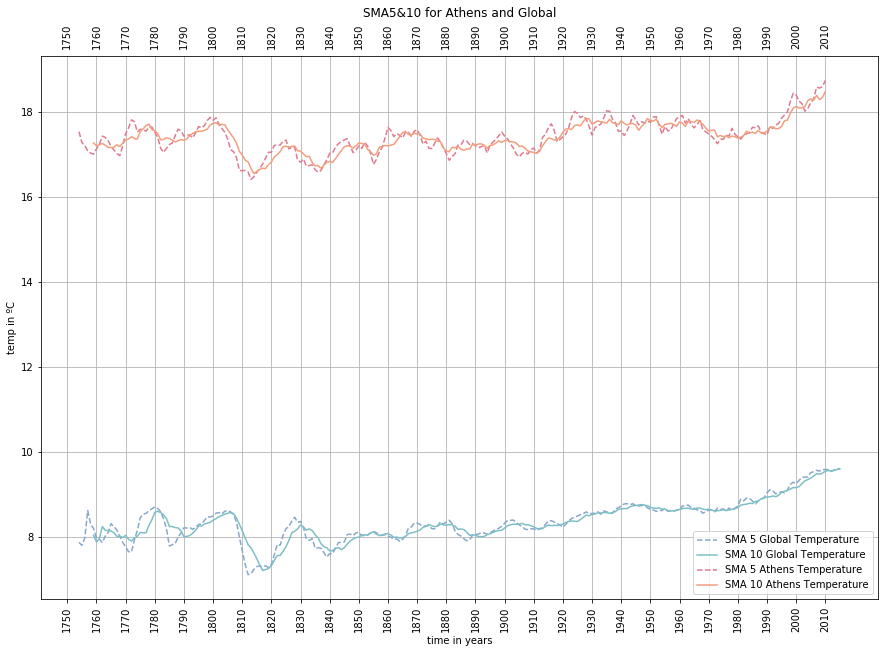

In [194]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.xlabel("time in years")
plt.ylabel("temp in ºC")
plt.title("SMA5&10 for Athens and Global")
plt.xticks((tempDataGlobal.index.tolist()[::10]), (tempDataGlobal['year'].tolist()[::10]), rotation=90, visible=True)
plt.plot(tempDataGlobal['avg_temp_global_SMA_5'],label='SMA 5 Global Temperature', linestyle='dashed', color='#87a7ca')
plt.plot(tempDataGlobal['avg_temp_global_SMA_10'],label='SMA 10 Global Temperature', color='#7dbfc7')
plt.plot(tempDataAtehns['avg_temp_Athens_SMA_5'],label='SMA 5 Athens Temperature', linestyle='dashed', color='#e1798f')
plt.plot(tempDataAtehns['avg_temp_Athens_SMA_10'],label='SMA 10 Athens Temperature', color='#f39e7d')
plt.legend(loc=0)

# The difference between the Athens and global Temperature in a Plot

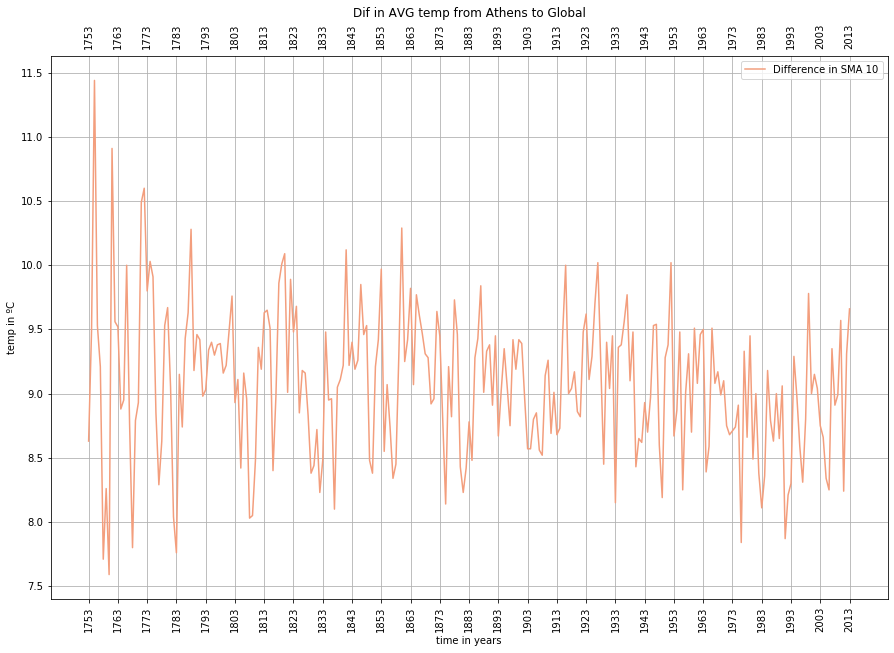

In [224]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.xlabel("time in years")
plt.ylabel("temp in ºC")
plt.title("Dif in AVG temp from Athens to Global")
plt.xticks((tempDataAtehns.index.tolist()[::10]), (tempDataAtehns['year'].tolist()[::10]), rotation=90, visible=True)
plt.plot(tempDataAtehns['avg_temp_athens']-tempDataGlobal['avg_temp_global'],label='Difference in SMA 10', color='#f39e7d')
plt.legend(loc=0)

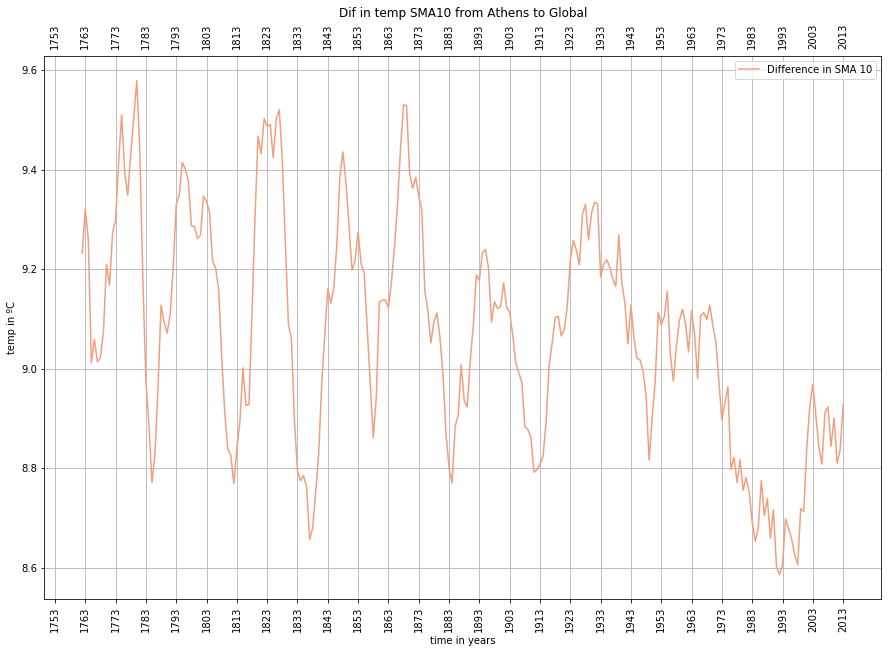

In [222]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.xlabel("time in years")
plt.ylabel("temp in ºC")
plt.title("Dif in temp SMA10 from Athens to Global")
plt.xticks((tempDataAtehns.index.tolist()[::10]), (tempDataAtehns['year'].tolist()[::10]), rotation=90, visible=True)
plt.plot(tempDataAtehns['avg_temp_Athens_SMA_10']-tempDataGlobal['avg_temp_global_SMA_10'],label='Difference in SMA 10', color='#f39e7d')
plt.legend(loc=0)

# For a better trend comparison
We 

In [119]:
tempDataMerged=pd.merge(tempDataAtehns, tempDataGlobal)

tempDataMerged['dif_avg_temp']=(tempDataMerged.iloc[:,1]-tempDataMerged.iloc[:,4])
tempDataMerged['dif_avg_temp_SMA_5']=(tempDataMerged.iloc[:,2]-tempDataMerged.iloc[:,5])
tempDataMerged['dif_avg_temp_SMA_10']=(tempDataMerged.iloc[:,3]-tempDataMerged.iloc[:,6])
tempDataMerged.head(10)

,year,avg_temp_athens,avg_temp_Athens_SMA_5,avg_temp_Athens_SMA_10,avg_temp_global,avg_temp_global_SMA_5,avg_temp_global_SMA_10,dif_avg_temp,dif_avg_temp_SMA_5,dif_avg_temp_SMA_10
0,1753,17.35,NaN,NaN,8.39,NaN,NaN,8.96,NaN,NaN
1,1754,17.47,NaN,NaN,8.47,7.868,NaN,9.00,NaN,NaN
2,1755,17.22,NaN,NaN,8.36,7.796,NaN,8.86,NaN,NaN
3,1756,17.92,NaN,NaN,8.85,7.970,NaN,9.07,NaN,NaN
4,1757,17.68,17.528,NaN,9.02,8.618,NaN,8.66,8.910,NaN
5,1758,16.07,17.272,NaN,6.74,8.288,NaN,9.33,8.984,NaN
6,1759,17.11,17.200,NaN,7.99,8.192,8.030,9.12,9.008,NaN
7,1760,16.61,17.078,NaN,7.19,7.958,7.877,9.42,9.120,NaN
8,1761,17.65,17.024,NaN,8.77,7.942,7.956,8.88,9.082,NaN
9,1762,17.55,16.998,17.263,8.61,7.860,8.239,8.94,9.138,9.024


In [120]:
print('Mean of the avergae yearly temp: ',tempDataMerged['dif_avg_temp'].mean())
print('Mean of the average SMA 5 temp: ',tempDataMerged['dif_avg_temp_SMA_5'].mean())
print('Mean of the average SMA 10 temp: ',tempDataMerged['dif_avg_temp_SMA_10'].mean())

Mean of the avergae yearly temp:  9.052490421455937
Mean of the average SMA 5 temp:  9.05139299610896
Mean of the average SMA 10 temp:  9.052396825396832


# Dif Result
With these calculations we will defince the avergae temp dif between global and Athens as 9.05 degrees and use this to plot again.

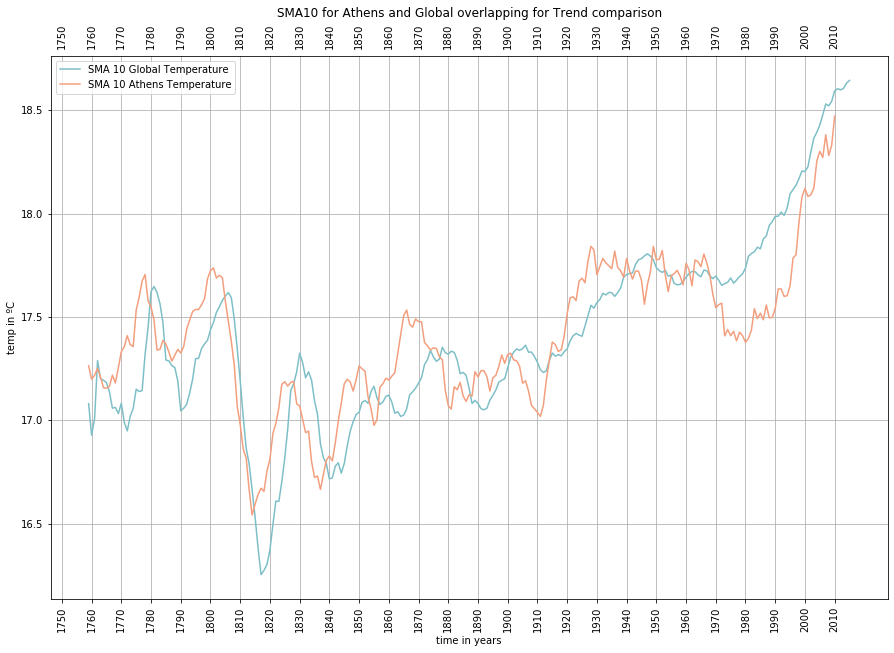

In [197]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.xlabel("time in years")
plt.ylabel("temp in ºC")
plt.title("SMA10 for Athens and Global overlapping for Trend comparison")
plt.xticks((tempDataGlobal.index.tolist()[::10]), (tempDataGlobal['year'].tolist()[::10]), rotation=90, visible=True)
plt.plot(tempDataGlobal['avg_temp_global_SMA_10']+9.05,label='SMA 10 Global Temperature', color='#7dbfc7')
plt.plot(tempDataAtehns['avg_temp_Athens_SMA_10'],label='SMA 10 Athens Temperature', color='#f39e7d')
plt.legend(loc=0)

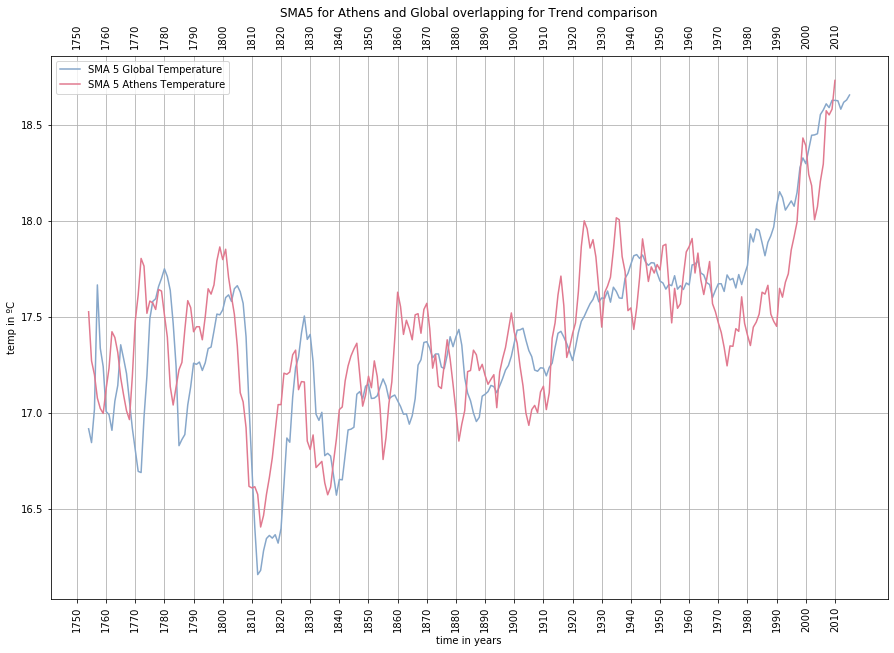

In [199]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.xlabel("time in years")
plt.ylabel("temp in ºC")
plt.title("SMA5 for Athens and Global overlapping for Trend comparison")
plt.xticks((tempDataGlobal.index.tolist()[::10]), (tempDataGlobal['year'].tolist()[::10]), rotation=90, visible=True)
plt.plot(tempDataGlobal['avg_temp_global_SMA_5']+9.05,label='SMA 5 Global Temperature', color='#87a7ca')
plt.plot(tempDataAtehns['avg_temp_Athens_SMA_5'],label='SMA 5 Athens Temperature', color='#e1798f')
plt.legend(loc=0)

# Extreme Points
Here are the Min and Max numbers

In [220]:
print('Min Avergare Temp Globaly: ')
print(tempDataGlobal.iloc[tempDataGlobal['avg_temp_global'].idxmin()])
print()
print('Max Avergare Temp Globaly: ')
print(tempDataGlobal.iloc[tempDataGlobal['avg_temp_global'].idxmax()])
print()
print('Min Trend Temp Globaly: ')
print(tempDataGlobal.iloc[tempDataGlobal['avg_temp_global_SMA_10'].idxmin()])
print()
print('Max Trend Temp Globaly: ')
print(tempDataGlobal.iloc[tempDataGlobal['avg_temp_global_SMA_10'].idxmax()])
print()
print('Min Avergare Temp Athens: ')
print(tempDataAtehns.iloc[tempDataAtehns['avg_temp_athens'].idxmin()])
print()
print('Max Avergare Temp Globaly: ')
print(tempDataAtehns.iloc[tempDataAtehns['avg_temp_athens'].idxmax()])
print()
print('Min Trend Temp Athens: ')
print(tempDataAtehns.iloc[tempDataAtehns['avg_temp_Athens_SMA_10'].idxmin()])
print()
print('Max Trend Temp Athens: ')
print(tempDataAtehns.iloc[tempDataAtehns['avg_temp_Athens_SMA_10'].idxmax()])


Min Avergare Temp Globaly: 
year                      1752.00
avg_temp_global              5.78
avg_temp_global_SMA_5         NaN
avg_temp_global_SMA_10        NaN
Name: 2, dtype: float64

Max Avergare Temp Globaly: 
year                      2015.000
avg_temp_global              9.830
avg_temp_global_SMA_5        9.608
avg_temp_global_SMA_10       9.594
Name: 265, dtype: float64

Min Trend Temp Globaly: 
year                      1817.000
avg_temp_global              6.980
avg_temp_global_SMA_5        7.298
avg_temp_global_SMA_10       7.203
Name: 67, dtype: float64

Max Trend Temp Globaly: 
year                      2015.000
avg_temp_global              9.830
avg_temp_global_SMA_5        9.608
avg_temp_global_SMA_10       9.594
Name: 265, dtype: float64

Min Avergare Temp Athens: 
year                      1768.000
avg_temp_athens             16.050
avg_temp_Athens_SMA_5       17.184
avg_temp_Athens_SMA_10      17.155
Name: 15, dtype: float64

Max Avergare Temp Globaly: 
year        

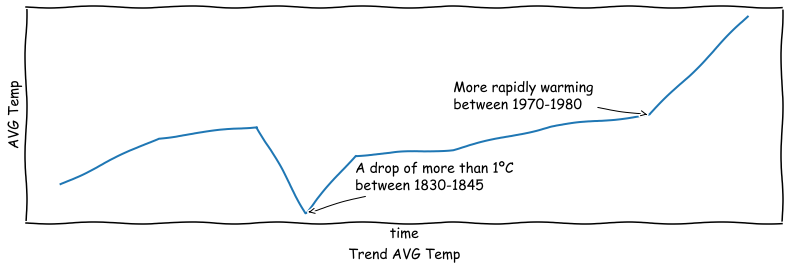

In [258]:
with plt.xkcd():
    fig = plt.figure(figsize=[15,10])
    ax = fig.add_axes([0.15, 0.1, 0.7, 0.3])
   
    ax.set_xticks([])
    ax.set_yticks([])
    x = [1,  2,3,3.5,  4,5  ,6,7,8]
    y = [1,1.8,2,0.5,1.5,1.6,2,2.2,3.9]

    ax.annotate(
        'A drop of more than 1ºC\nbetween 1830-1845',
        xy=(3.5, 0.5), arrowprops=dict(arrowstyle='->'), xytext=(4, 0.9))

    
    ax.annotate(
        'More rapidly warming\nbetween 1970-1980',
        xy=(7, 2.2), arrowprops=dict(arrowstyle='->'), xytext=(5, 2.3))

    ax.plot(x,y)

    ax.set_xlabel('time')
    ax.set_ylabel('AVG Temp')
    fig.text(
        0.5, 0.05,
        'Trend AVG Temp',
        ha='center')